<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import plotly.express as px 
import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Peliculas.xlsx?raw=true"
datos=pd.read_excel(url)
datos1 = datos.drop(datos.columns[[8,9,10,11,12,13,14,15,16]], axis='columns')
datos1

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,Animation,Children,1995.0,4.0,114709,862.0
1,2,Jumanji,Children,Fantasy,1995.0,4.0,113497,8844.0
2,3,Grumpier Old Men,Romance,no-genres-listed,1995.0,4.5,113228,15602.0
3,4,Waiting to Exhale,Drama,Romance,1995.0,2.5,114885,31357.0
4,5,Father of the Bride Part II,no-genres-listed,no-genres-listed,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,Sci-Fi,no-genres-listed,2015.0,4.0,2637294,243938.0
8777,128991,Johnny Express,Comedy,Sci-Fi,2014.0,4.5,3723996,269711.0
8778,129011,Eddie Izzard: Glorious,no-genres-listed,no-genres-listed,1997.0,4.5,195753,13590.0
8779,129229,Northmen - A Viking Saga,Adventure,no-genres-listed,2014.0,5.0,2290553,286873.0


In [115]:
datos1.isnull().sum()


Pelicula            0
Titulo              0
Clasificacion 1     0
Clasificacion 2     0
year               23
rating              0
imdbId              0
tmdbId              8
dtype: int64

In [116]:
datos1.dropna()
clean_datos=datos1.dropna()
clean_datos.isnull().sum()

Pelicula           0
Titulo             0
Clasificacion 1    0
Clasificacion 2    0
year               0
rating             0
imdbId             0
tmdbId             0
dtype: int64

Si no sabemos el titilo de la pelicula de poco nos serviran el resto de datos,las peliculas sin años tambien pueden ser eliminadas.

In [117]:
text= {
    
  "Pelicula":{
    "0":129333,
    "1":129354,
    "2":129397,
    "3":129428,
    "4":129514,
    "5":129657
  },
  "Titulo":{
    "0":"Julia ",
    "1":"Focus ",
    "2":"Marvel One-Shot: Item 47 ",
    "3":"The Second Best Exotic Marigold Hotel ",
    "4":"George Carlin: It's Bad for Ya! ",
    "5":"Tracers "
  },
  "Clasificacion 1":{
    "0":"no-genres-listed",
    "1":"Thriller",
    "2":"Crime",
    "3":"Fantasy",
    "4":"Drama",
    "5":"no-genres-listed"
  },
  "Clasificacion 2":{
    "0":"no-genres-listed",
    "1":"no-genres-listed",
    "2":"Drama",
    "3":"Sci-Fi",
    "4":"no-genres-listed",
    "5":"no-genres-listed"
  },
  "year":{
    "0":2014,
    "1":2014,
    "2":2015,
    "3":2012,
    "4":2015,
    "5":2008
  },
  "rating":{
    "0":4.5,
    "1":5.0,
    "2":5.0,
    "3":4.5,
    "4":3.0,
    "5":4.5  
  },
  "imdbId":{
    "0":2392672	,
    "1":2582426	,
    "2":2381941	,
    "3":2247732	,
    "4":2555736	,
    "5":963207   
  },
  " tmdbId":{
    "0":179150,
    "1":278632,
    "2":256591,
    "3":119569,
    "4":268238,
    "5":13643	     
  }
}

text=pd.DataFrame(text)
text

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,129333,Julia,no-genres-listed,no-genres-listed,2014,4.5,2392672,179150
1,129354,Focus,Thriller,no-genres-listed,2014,5.0,2582426,278632
2,129397,Marvel One-Shot: Item 47,Crime,Drama,2015,5.0,2381941,256591
3,129428,The Second Best Exotic Marigold Hotel,Fantasy,Sci-Fi,2012,4.5,2247732,119569
4,129514,George Carlin: It's Bad for Ya!,Drama,no-genres-listed,2015,3.0,2555736,268238
5,129657,Tracers,no-genres-listed,no-genres-listed,2008,4.5,963207,13643


In [118]:
clean_datos.describe()

,Pelicula,year,rating,imdbId,tmdbId
count,8750.000000,8750.000000,8750.000000,8.750000e+03,8750.000000
mean,29629.927543,1993.045257,3.548514,4.439360e+05,32511.311200
std,37530.128073,18.270663,1.036435,6.343205e+05,50119.955903
min,1.000000,1902.000000,0.500000,4.170000e+02,2.000000
25%,2909.000000,1987.000000,3.000000,9.271725e+04,9339.250000
50%,6416.000000,1998.000000,3.500000,1.207925e+05,14204.500000
75%,55111.500000,2006.000000,4.000000,4.250395e+05,34810.500000
max,129250.000000,2018.000000,5.000000,4.368814e+06,503475.000000


In [119]:
clean_datos.groupby("Clasificacion 1")['rating'].mean()

Clasificacion 1
Adventure           3.586837
Animation           3.541667
Children            3.714592
Comedy              3.492870
Crime               3.518640
Documentary         3.695652
Drama               3.598689
Fantasy             3.497890
Film-Noir           3.761905
Horror              3.492188
IMAX                3.900000
Musical             3.481013
Mystery             3.508889
Romance             3.536213
Sci-Fi              3.447552
Thriller            3.585288
War                 3.512987
Western             3.310000
no-genres-listed    3.539967
Name: rating, dtype: float64

In [120]:
clean_datos.groupby("Clasificacion 1")['Clasificacion 1'].count()

Clasificacion 1
Adventure            547
Animation            192
Children             233
Comedy               561
Crime                456
Documentary           46
Drama               1525
Fantasy              237
Film-Noir             42
Horror               320
IMAX                  10
Musical              158
Mystery              225
Romance              787
Sci-Fi               286
Thriller             469
War                  154
Western               50
no-genres-listed    2452
Name: Clasificacion 1, dtype: int64

In [121]:
#Agrupando la cantidad de peliculas por genero
h=["Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","IMAX","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western","no-genres-listed"] 
J=[]
for e in range(19):   
 J.append(clean_datos.apply(lambda x: x['Clasificacion 1'] == h[e], axis=1).sum())
print(J)

[547, 192, 233, 561, 456, 46, 1525, 237, 42, 320, 10, 158, 225, 787, 286, 469, 154, 50, 2452]


Text(0, 0.5, 'Cantidad de filmes por genero')

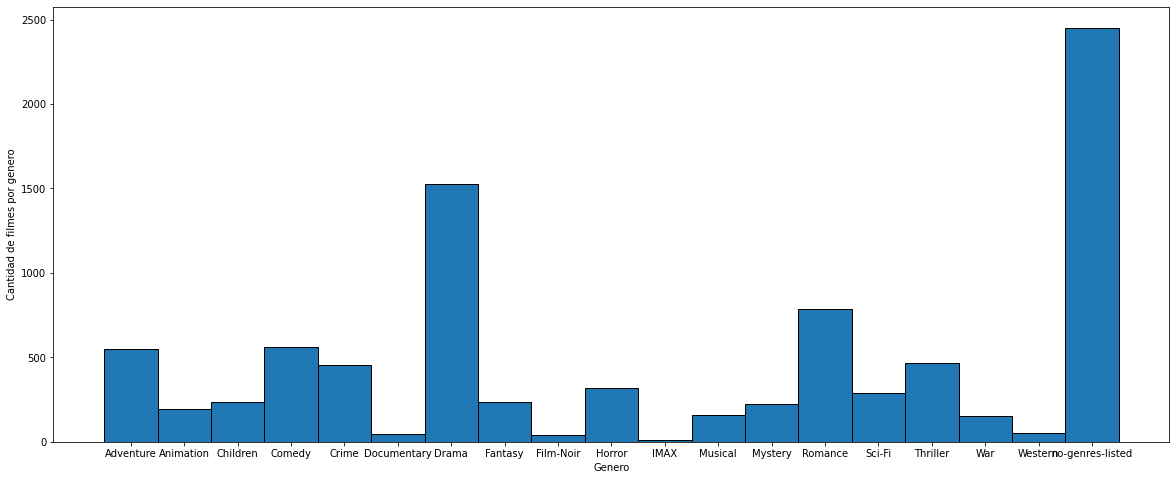

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(x=h, height=J, width=1, edgecolor="black")
ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad de filmes por genero')


In [123]:
#Codificando los generos cinematograficos para poderlos usar en la prediccion
GENERO_MAPEO = { "Adventure":1,"Animation":2,"Children":3,"Comedy":4,"Crime":5,"Documentary":6,"Drama":7,"Fantasy":8,"Film-Noir":9,"Horror":10,"IMAX":11,"Musical":12,"Mystery":13,"Romance":14,"Sci-Fi":15,"Thriller":16,"War":17,"Western":18,"no-genres-listed":0}
list_genero=clean_datos['Clasificacion 1']
list_genero= list_genero.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 1']=list_genero
list_genero2=clean_datos['Clasificacion 2']
list_genero2= list_genero2.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 2']=list_genero2
clean_datos

<ipython-input-123-dc3d3d973b29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datos['Clasificacion 1']=list_genero
<ipython-input-123-dc3d3d973b29>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datos['Clasificacion 2']=list_genero2


,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,2,3,1995.0,4.0,114709,862.0
1,2,Jumanji,3,8,1995.0,4.0,113497,8844.0
2,3,Grumpier Old Men,14,0,1995.0,4.5,113228,15602.0
3,4,Waiting to Exhale,7,14,1995.0,2.5,114885,31357.0
4,5,Father of the Bride Part II,0,0,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,15,0,2015.0,4.0,2637294,243938.0
8777,128991,Johnny Express,4,15,2014.0,4.5,3723996,269711.0
8778,129011,Eddie Izzard: Glorious,0,0,1997.0,4.5,195753,13590.0
8779,129229,Northmen - A Viking Saga,1,0,2014.0,5.0,2290553,286873.0


In [126]:
train_x=clean_datos.drop(['Titulo'], axis=1)
train_y=clean_datos['rating']
train_x,train_y

(      Pelicula  Clasificacion 1  Clasificacion 2    year  rating   imdbId  \
 0            1                2                3  1995.0     4.0   114709   
 1            2                3                8  1995.0     4.0   113497   
 2            3               14                0  1995.0     4.5   113228   
 3            4                7               14  1995.0     2.5   114885   
 4            5                0                0  1995.0     4.5   113041   
 ...        ...              ...              ...     ...     ...      ...   
 8776    128975               15                0  2015.0     4.0  2637294   
 8777    128991                4               15  2014.0     4.5  3723996   
 8778    129011                0                0  1997.0     4.5   195753   
 8779    129229                1                0  2014.0     5.0  2290553   
 8780    129250                0                0  2015.0     5.0  2933474   
 
         tmdbId  
 0        862.0  
 1       8844.0  
 2      

In [127]:
train_x.dtypes

Pelicula             int64
Clasificacion 1      int64
Clasificacion 2      int64
year               float64
rating             float64
imdbId               int64
tmdbId             float64
dtype: object

In [128]:
train_x['Pelicula'] = clean_datos['Pelicula'].astype('float64')
train_x['year'] = clean_datos['year'].astype('float64')

In [129]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(train_x)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = StandardScaler()
#X = X.values
X_std =  sc.fit_transform(train_x)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(X_std)

[[-0.78951558 -0.73311559 -0.22025252 ...  0.43563897 -0.51905285
  -0.63150734]
 [-0.78948893 -0.55659491  0.57651016 ...  0.43563897 -0.52096366
  -0.47224031]
 [-0.78946228  1.38513254 -0.69831013 ...  0.91808942 -0.52138776
  -0.3373961 ]
 ...
 [ 2.64818579 -1.08615695 -0.69831013 ...  0.91808942 -0.39128048
  -0.37754208]
 [ 2.65399479 -0.90963627 -0.69831013 ...  1.40053986  2.91133987
   5.07534814]
 [ 2.65455437 -1.08615695 -0.69831013 ...  1.40053986  3.92495643
   5.84324984]]


In [130]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)

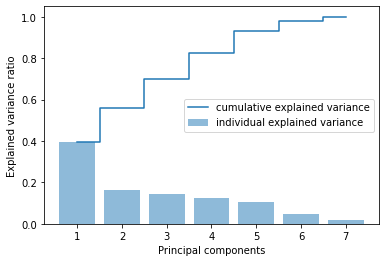

In [131]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
pca = PCA(n_components = 5)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

In [133]:
pca.explained_variance_ratio_.sum()

0.8256296342626803

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pca4'])
pca_db

,pca1,pca2,pca3,pca4
0,-0.216022,-0.103361,-0.227580,-0.119495
1,0.051680,-0.149321,-0.306361,-0.120759
2,-0.103980,-0.334828,0.409705,-0.230113
3,0.426939,-0.291615,-0.279645,0.209447
4,-0.403467,-0.029247,-0.239655,-0.228457
...,...,...,...,...
8745,0.226453,0.738318,0.834317,-0.004150
8746,0.755724,1.004886,-0.015799,-0.108628
8747,-0.168179,0.753920,0.027499,-0.149416
8748,-0.073459,1.052464,0.187880,-0.224670


In [135]:
pca_db.var()

pca1    0.130280
pca2    0.113449
pca3    0.089234
pca4    0.052493
dtype: float64

In [136]:
pca.components_

array([[ 0.23273807,  0.38477118,  0.88517177,  0.06339865,  0.01997278,
         0.09467547,  0.02955215],
       [ 0.77272775, -0.394651  , -0.09669346,  0.26254497,  0.09215141,
         0.35567092,  0.18403598],
       [ 0.26363971,  0.83423487, -0.45424714,  0.0780381 ,  0.031087  ,
         0.12828516,  0.06850106],
       [ 0.07751769, -0.00232145, -0.00520355,  0.05574214, -0.9946398 ,
         0.03375956,  0.02008287]])

In [137]:
print(pca.explained_variance_ratio_)

[0.31484817 0.2741733  0.21565117 0.12685887]


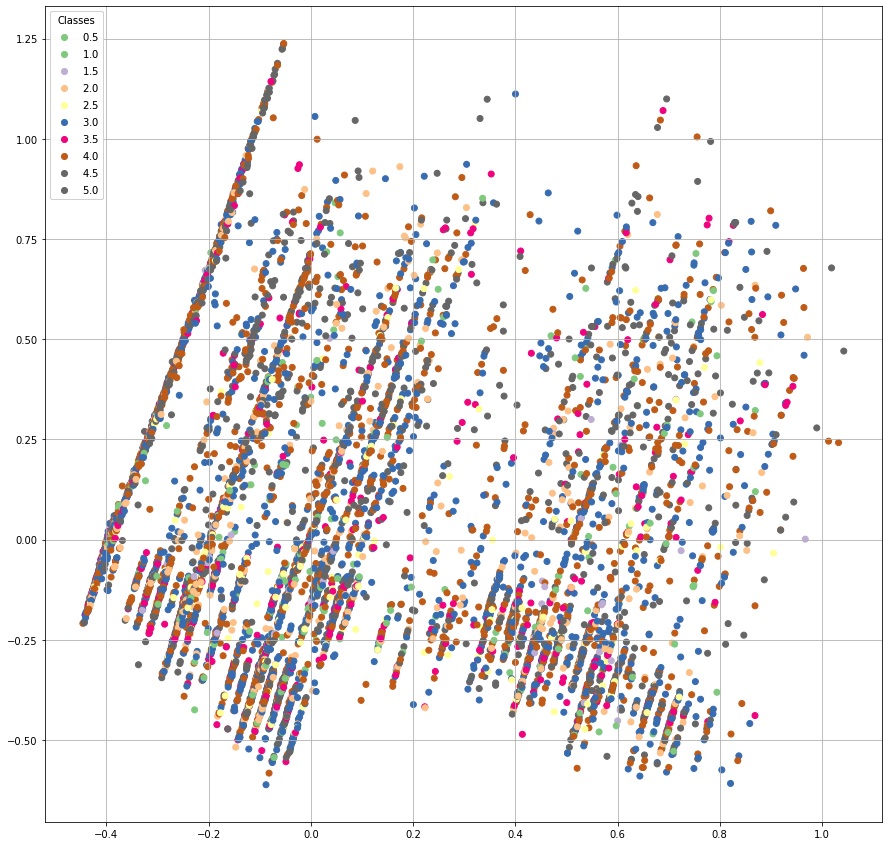

In [138]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
Y=datos1['rating']
grafico=pca_db
grafico['class']=Y
scatter = ax.scatter(grafico['pca1'],grafico['pca2'],c=grafico['class'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [142]:
# Entrenemos el modelo

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
train_y = train_y.astype('int')
model.fit(train_x,train_y)

SGDClassifier()

In [144]:
from sklearn import metrics

predicted_train = model.predict(train_x)
metrics.accuracy_score(train_y, predicted_train)

0.3241142857142857

In [146]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced,train_y, test_size = 0.2, random_state = 1) 

In [148]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), SGDClassifier(max_iter=10000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.45714285714285713

In [ ]:
import seaborn as sn
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 400):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 400)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()